# The mathematical building blocks of neural networks 

## A First Look at NN

In [85]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

In [2]:
# loading the mnist dataset in Keras
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Transform it into `float32` array of shape `60000,28*28`,
and `10000,28*28` with a values between 0 and 1

In [3]:
# data preprocessing
train_X = train_X.reshape((60000, 28*28))
train_X = train_X.astype('float32') / 255

test_X = test_X.reshape((10000, 28*28))
test_X = test_X.astype('float32') / 255

layers--Think a layers of Hidden neurons work as a filter

In [4]:
# build network architecture
nn = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M1 Pro


2022-02-05 15:27:35.114829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-05 15:27:35.115532: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


- optimizer--The mechanism through which the model will update itself based on the training data it sees
- loss function--How the model will be able to measure its performance on the training data, and thus how it will be able steer itself in the right direction
- metrics--Monitor during training and testing

In [5]:
# compile step
nn.compile(optimizer='rmsprop',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

To train a model in `Keras` is done via call to the model's `fit()` 
method

In [7]:
# fitting the model
nn.fit(train_X, train_y, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0168 - accuracy: 0.9956
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0102 - accuracy: 0.9969
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0084 - accuracy: 0.9977
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0032 - accuracy: 0.9991

Using trained model to predic class probabilities for new digits-images
that in the test set

In [10]:
# using the model to make prediction
test_digits = test_X[0:10]
predictions = nn.predict(test_digits)

print(predictions[6].argmax())
print(predictions[0][6])

# ground truth
print(test_y[6])

4
9.974448e-25
4


Checking how good is our model at classifying such never-before-seen digits? by calling model's `evaluate() ` method


In [11]:
# evaluating the model on new data
test_loss, test_acc = nn.evaluate(test_X, test_y)
print(f'Test accuracy: {test_acc}')

 36/313 [==>...........................] - ETA: 1s - loss: 0.0694 - accuracy: 0.9852 

2022-02-05 15:29:02.020242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0768 - accuracy: 0.9822
Test accuracy: 0.982200026512146


## Data representations for neural networks

A tensors are a generalization of matrices to an arbitrary number of dimensions

In [12]:
# scalars
# a tensor that contains only one number
x = np.array(26)
x.ndim

0

In [13]:
# vectors
# an array of numbers
x = np.array((8, 26))
x.ndim

1

In [14]:
# matrices
# an array of vectors 
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [15]:
# higher dimension tensor
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

Key attributes:
A tensor is defined by three key attributes: `number of axes`, `shape`, `data type`

In [16]:
# key attr
print('number of axes1:', x.ndim)
print('shape:', x.shape)
print('data types:', x.dtype)

number of axes1: 3
shape: (3, 3, 5)
data types: int64


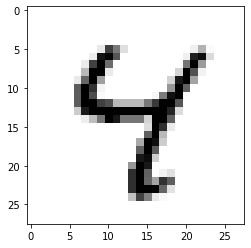

image label: 4


In [21]:
# displaying the digit
# loading the mnist dataset in Keras
(train_X, train_y), (test_X, test_y) = mnist.load_data()

digit = test_X[6]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print('image label:', test_y[6])

### Manipulating tensors in Numpy

In [22]:
# slicing 
my_slice = train_X[10:100]
my_slice.shape

(90, 28, 28)

### The notion of data batches

In [23]:
# batch 
batch1 = train_X[:128]
batch1.shape

(128, 28, 28)

In [24]:
# next batch
batch2 = train_X[128:128*2]

In [25]:
# the nth batch
n = 3
batch_size = 128

batchn = train_X[n*batch_size:(n+1)*batch_size]

### Real-world example of data tensor
- `vector data`--(**samples**, **features**)
- `timeseries data or sequence data`--(**samples**, **timesteps**, **features**)
- `Images`--(**samples**, **height**, **width**, **channels**)
- `Videos`--(**samples**, **frames**, **height**, **width**, **channels**)

### Tensor operations

In [30]:
# element-wise operations
x = np.random.randn(20, 100)
y = np.random.randn(20, 100)

# relu activation
z = np.maximum(x, 0)
print(z)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13553474 0.53287657 ... 1.81073787 0.23288961 0.0660923 ]
 [0.         0.         0.         ... 1.1599795  1.94013514 0.67518594]
 ...
 [0.         0.         0.99739962 ... 0.         0.37444534 0.        ]
 [0.21347639 0.52137885 0.         ... 0.76667469 0.         0.        ]
 [0.         1.1735978  0.55814185 ... 1.13314113 0.99315031 0.4343458 ]]


In [33]:
# broadcasting
# axes are added to the smaller tensor to match the ndim of the largere tensor
# the smaller tensor is repeated alongside these new axes to math the full shape of large tensor
x = np.random.randn(32, 10)
y = np.random.randn(10)

addition = x + y
print(addition.shape)

(32, 10)


In [41]:
# tensor product 
x = np.random.randn(32)
y = np.random.randn(32)

z = np.dot(x, y)
print(z)

-3.5932764023259334


In [50]:
# tensor reshpaing
x = np.array([[0, 1],
              [2, 3],
              [4, 5]])
print('x shape:', x.shape)
xreshape = x.reshape((6,1))
print('reshape x:', xreshape.shape)
xtranspose = x.T
print('transpose x:', xtranspose.shape)

x shape: (3, 2)
reshape x: (6, 1)
transpose x: (2, 3)


### Geometric interpretation of tensor operation
- `Translation`--Adding a vector to a point will move the point by a fixed amount in a fixed direction.
- `Rotation`--A counterclockwise rotation of a 2D vector by an angle theta can be achieved via a dot product with 2 x 2 matrix **R** = `[[cos(theta),-sin(theta)],[sin(theta), cos[theta])`
- `Scaling`--A vertical and horizontal scaling of the image can be achieved via a dot product with 2 x 2 matrix **S** = `[[h_factor, 0], [0, v_factor]]`
- `Linear tranfrom` A dot product with an arbitrary matrix implements a linear transform.
- `Affine transform` An affine transform is the combination of a linear transform and translation.

### The engine of nn: Gradient-based optimization
output = relu(dot(input, W) + b)\
\
What happen inside this network?
1. Initialize the weights and biase matrices, fill with small random values (*random initialization*)
2. Run the model on x (*forward pass*) to obtain predictions, `y_pred`.
3. Compute the loss of the model on the batch, a measure lost between `y_pred` and `y_true`.
4. Update all weights and biases of th model in a way that slightly reduces the loss on this batch via `gradient descent`
\
**Gradient descent** is th optimization technique tht powers modern nn. All of the functions used in the models transform thier input in a smooth and continuous way.\
**Derivative** simply is a slope of y change respectly to x `dy` / `dx`

---
## Reimplementing nn from scratch in Tensorflow

In [82]:
# dense layer
class Dense:
    def __init__(self, inputs_size, output_size, activation):
        self.activation = activation
        
        weights_shape = (inputs_size, output_size)
        weights_init = tf.random.uniform(weights_shape,
                                         minval=0, maxval=1e-1)
        biases_init = tf.zeros(output_size, 1)
        
        self.W = tf.Variable(weights_init)
        self.b = tf.Variable(biases_init)
    
    def __call__(self, inputs):
            return self.activation(tf.matmul(
                                    self.weights, inputs) + self.biases)
        
    @property
    def weights(self):
        return [self.W, self.b]

In [83]:
# sequential class
class Sequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layers(x)
            
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
            
        return weights

In [87]:
# batch generator
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.idx = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
        
    def next(self):
        images = self.images[self.idx : self.idx + self.batch_size]
        labels = self.labels[self.idx : self.idx + self.batch_size]
        self.idx += self.batch_size
        return images, labels

In [84]:
# create a nn model
model = Sequential([
    Dense(inputs_size=784, output_size=512, activation=tf.nn.relu),
    Dense(inputs_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [88]:
# running one training step
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        pred = model(images_batch)
        per_sample_losses = tf.keras.loss.sparse_categorical_crossentropy(
        labels_batch, prediction)
        # calculate average loss
        average_loss = tf.reduce_mean(per_sample_losses)
    
    # gradient descent
    grads = tape.gradient(average_loss, model.weights)
    update_weights(grads, model.weights)
    
    return average_loss

In [89]:
def update_weights(gradient, weights):
    for g, w in zip(gradient, weights):
        w.assign_sub(g * learning_rate)